<a href="https://colab.research.google.com/github/Randasabag/Etude_Sante_Publique/blob/main/P4_alsabbagh_Etude_Sante_Publique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Lexique des données</h1>

Il y a 4 fichiers CSV à disposition :
1.	Un fichier de disponibilité alimentaire pour l’année 2017 qui contient 17 variables :
        -	Le pays
        -	Le produit
        -	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
        -	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
        -	Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.
        
2.	Un fichier d’insécurité alimentaire, qui inclut :
        -	Le pays
        -	Intervalle d’années
        -	Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour l’intervalle 2016-2018, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2017).
        

3.	Un fichier de population qui inclut :
        -	Le pays
        -	L’année
        -	La population du pays, exprimée en milliers d’habitants.
        
4.	Un fichier d’aide alimentaire qui contient :
        -	Le pays bénéficiaire
        -	L’année
        -	Le produit
        -	La quantité qui a été donnée comme aide alimentaire, en tonnes.
        
L’ensemble de ces fichiers provient initialement des données de la FAO téléchargeables librement ici : http://www.fao.org/faostat/fr/#data

<b>Notes de mes précédentes recherches: </b>

    ●	La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.

    ●	La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays.

    ●	Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + …
    Mais je ne me souviens plus exactement !

    ●	Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus.

    ●	Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.


<h1>Présentation du code et des résultats</h1>

<font color='turquoise'>**Import de la librairie Pandas et Matplotlib**</font>

In [1]:
#manipulation et analyse de données 
#Pandas gère un grand nombre de données, a beaucoup de fonctionnalités et est simple à utiliser 
#2 structures de données : Dataframe / Series
import pandas as pd

#visualisation graphique des données 
import matplotlib.pyplot as plt

import io
from google.colab import files

In [2]:
uploaded = files.upload()

Saving aide_alimentaire.csv to aide_alimentaire.csv
Saving dispo_alimentaire.csv to dispo_alimentaire.csv
Saving population.csv to population.csv
Saving sous_nutrition.csv to sous_nutrition.csv


**Lecture des fichiers csv : aide_alimentaire, population, sous_nutrition, dispo_alimentaire**

In [46]:
df_aa=pd.read_csv(io.BytesIO(uploaded['aide_alimentaire.csv']))
df_da=pd.read_csv(io.BytesIO(uploaded["dispo_alimentaire.csv"]))
df_pop=pd.read_csv(io.BytesIO(uploaded["population.csv"]))
df_sn=pd.read_csv(io.BytesIO(uploaded["sous_nutrition.csv"]))

Les informations sont demandées  pour l’année 2017.

<font color='turquoise'>**PRE-TRAITEMENT DES DONNEES**<font/>


Nettoyage du tableau sous_nutrition 

In [47]:
df_sn

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [48]:
#renomme la colonne Valeur par Nb hab sousnut pour avoir un sens plus explicite et faire la différence avec les colonnes des autres tables
df_sn=df_sn.rename(columns={'Valeur':'Nb hab sousnut','Zone':'Pays'})

#existence de valeurs null 
df_sn[df_sn['Nb hab sousnut'].isnull()]

#pas de doublons 
df_sn[(df_sn.duplicated(keep=False))==True]

,Pays,Année,Nb hab sousnut


In [49]:
#remplace la valeur '<0.1' (inferieure à 100000 personnes) par 0 (impact faible)
df_sn['Nb hab sousnut']=df_sn['Nb hab sousnut'].replace(['<0.1'],'0')
df_sn['Nb hab sousnut']=df_sn['Nb hab sousnut'].fillna(0)

#changement de types des champs 
df_sn=df_sn.astype({'Pays':str, 'Année':str, 'Nb hab sousnut':float})
df_sn.dtypes

Pays               object
Année              object
Nb hab sousnut    float64
dtype: object

In [50]:
#conversion pour avoir les mêmes unités entre les differentes données : *1000000 du nombre d'habitants en sous-nutrition 
df_sn['Nb hab sousnut']=df_sn['Nb hab sousnut']*1000000

In [51]:
#Affiche les lignes ordonnées par odre croissant en fonction du nombre d'habitants en sous nutrition
#df_sn.sort_values(['Nb hab sousnut']).head(60)
df_sn

,Pays,Année,Nb hab sousnut
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


Nettoyage du tableau population

In [52]:
#renomme la colonne Valeur par Nb hab sousnut
df_pop=df_pop.rename(columns={'Valeur':'Nb hab', 'Zone':'Pays'})

#pas de valeur null dans population
df_pop[df_pop['Nb hab'].notnull()]

#pas de doublons 
df_pop[(df_pop.duplicated(keep=False))==True]

,Pays,Année,Nb hab


In [53]:
#conversion pour avoir les mêmes unités entre les differentes données : *1000 le nombre d'habitants 
df_pop['Nb hab']=df_pop['Nb hab']*1000

In [54]:
#types corrects
df_pop.dtypes

#Je garde seulement les donnees de la Chine continentale car elle inclut les donnees des 3 provinces ci-dessous
df_pop=df_pop.drop(df_pop[(df_pop['Pays']=='Chine - RAS de Hong-Kong') | 
                             (df_pop['Pays']=='Chine - RAS de Macao') | 
                             (df_pop['Pays']== 'Chine, Taiwan Province de')].index)

#Affiche les lignes ordonnées par ordre croissant en fonction du nombre d'habitants
df_pop.sort_values(['Nb hab'])

,Pays,Année,Nb hab
1174,Saint-Siège,2017,7.930000e+02
1171,Saint-Siège,2014,8.000000e+02
1175,Saint-Siège,2018,8.010000e+02
1173,Saint-Siège,2016,8.010000e+02
1170,Saint-Siège,2013,8.010000e+02
...,...,...,...
259,"Chine, continentale",2014,1.399454e+09
260,"Chine, continentale",2015,1.406848e+09
261,"Chine, continentale",2016,1.414049e+09
262,"Chine, continentale",2017,1.421022e+09


Nettoyage du tableau aide_alimentaire

In [55]:
#renomme la colonne Valeur par Quantite
df_aa=df_aa.rename(columns={'Valeur':'Quantite', 'Pays bénéficiaire':'Pays'})

#pas de valeur null dans aide alimentaire
df_aa[df_aa['Quantite'].notnull()]

#pas de doublons 
df_aa[(df_aa.duplicated(keep=False))==True]

,Pays,Année,Produit,Quantite


In [56]:
#conversion pour avoir les mêmes unités entre les differentes données : *1000 (conversion de tonnes en kg)
df_aa['Quantite']=df_aa['Quantite']*1000

In [57]:
#types corrects
df_aa.dtypes

#Affiche les lignes ordonnées par ordre décroissant en fonction de la quantité 
df_aa.sort_values(['Quantite'], ascending=False)

,Pays,Année,Produit,Quantite
363,Éthiopie,2014,Céréales,265013000
362,Éthiopie,2013,Céréales,256196000
1014,République arabe syrienne,2014,Céréales,225007000
1297,Soudan du Sud,2014,Céréales Secondaires,213730000
1294,Soudan du Sud,2014,Céréales,213730000
...,...,...,...,...
1386,Tchad,2013,"Lait, total",0
1338,Sri Lanka,2015,"Sucre, total",0
1362,Tadjikistan,2015,"Lait, total",0
1368,Tadjikistan,2015,Non-céréales,0


Nettoyage du tableau disponibilité alimentaire




In [58]:
#renomme les colonnes 
df_da=df_da.rename(columns={'Zone':'Pays',
                           'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo al', 
                            'Disponibilité alimentaire en quantité (kg/personne/an)':'Dispo al grammes',
                            'Disponibilité de matière grasse en quantité (g/personne/jour)':'Dispo matiere grasse',
                            'Disponibilité de protéines en quantité (g/personne/jour)': 'Dispo proteines',
                            'Disponibilité intérieure': 'Dispo interieure'
                            })

#remplacement des valeurs null par 0
df_da=df_da.fillna(0)

#pas de doublons 
df_da[(df_da.duplicated(keep=False))==True]

#changement des types
df_da=df_da.astype({'Pays':str, 'Produit':str, 'Origine':str})

In [59]:
#conversion pour avoir les mêmes unités entre les differentes données :  disponibilite alimentaire en quantité de "kg/personne/an" en "g/personne/jour" 
df_da['Dispo al grammes']=df_da['Dispo al grammes'] * 1000 / 365

In [60]:
#affiche les lignes ordonnées par ordre croissant en fonction de la disponibilité em grammes
df_da.sort_values(['Dispo al grammes'])

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Dispo al,Dispo al grammes,Dispo matiere grasse,Dispo proteines,Dispo interieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7029,Japon,Avoine,vegetale,50.0,1.0,-21.0,-5.287671,-0.03,-0.37,-159.0,-41.0,-201.0,-246.0,0.0,0.0,0.0,35.0,0.0
2479,Bénin,Huile d'Olive,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8773,Malte,"Sucre, betterave",vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2481,Bénin,Huile de Colza&Moutarde,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2482,Bénin,Huile de Germe de Maïs,vegetale,0.0,0.0,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,Suisse,Lait - Excl Beurre,animale,816.0,476.0,398.0,873.123288,25.77,24.56,3958.0,580.0,507.0,2574.0,0.0,4032.0,0.0,91.0,0.0
13385,Suède,Lait - Excl Beurre,animale,54.0,33.0,391.0,934.876712,21.22,26.93,3353.0,982.0,1425.0,3266.0,0.0,2910.0,0.0,0.0,0.0
10843,Pays-Bas,Lait - Excl Beurre,animale,599.0,0.0,460.0,935.534247,27.66,28.89,6243.0,10714.0,5133.0,5723.0,0.0,12433.0,0.0,0.0,-608.0
9284,Monténégro,Lait - Excl Beurre,animale,43.0,0.0,514.0,956.739726,31.29,30.26,265.0,2.0,83.0,217.0,4.0,184.0,0.0,0.0,0.0


<h2>REQUETES DE MARC</h2>

<font color='turquoise'>**1-PROPORTION DE PERSONNES EN ETAT DE SOUS-NUTRITION**<font/>

In [72]:
#Calcul de la somme totale des habitants en etat de sous-nutrition en 2017 correspondant à l'intervalle 2016-2018
habsn=sum(df_sn[(df_sn['Année'] == '2016-2018')]['Nb hab sousnut'])
habsn

#Calcul de la population totale en 2017
poptot=sum(df_pop[(df_pop['Année'] == 2017)]['Nb hab'])
poptot

#Calcul de la proportion de personnes en etat de sous-nutrition en 2017
prop=habsn * 100 / poptot

#Affichage du résultat 
print('La proportion de personnes en etat de sous-nutrition en 2017 est de :', round(prop,3), '%')

La proportion de personnes en etat de sous-nutrition en 2017 est de : 7.127 %


<font color='turquoise'>**2- NOMBRE THEORIQUE DE PERSONNES QUI POURRAIENT ETRE NOURRIES (à partir de la disponibilité alimentaire mondiale)**<font/>

In [62]:
#Jointure entre les tables disponibilite alimentaire et population faite à cette étape pour éviter les problemes de performance 
#si la jointure est faite avant le pre-traitement alors il s'executera un produit cartesien avec les doublons présents 
df_da_pop=pd.merge(df_da, df_pop, left_on='Pays', right_on='Pays')
df_da_pop2017=df_da_pop[(df_da_pop['Année']==2017)]

#On suppose qu'une personne est rassasiée avec 2500 calories par jour
nb_pers_nourries= sum(df_da_pop2017['Nb hab'] * df_da_pop2017['Dispo al'])/2500

#calcul du pourcentage de personnes qui pourraient être nourries en 2017
pourcentage_personnes=nb_pers_nourries*100/poptot 

#Affichage des résultats 
print('Nombre de personnes qui pourraient être nourries en 2017:', round(nb_pers_nourries,2))
print('Pourcentage de personnes qui pourraient être nourries en 2017:', round(pourcentage_personnes,2),'%')

Nombre de personnes qui pourraient être nourries en 2017: 8328873971.62
Pourcentage de personnes qui pourraient être nourries en 2017: 110.81 %


<font color='turquoise'>**3- NOMBRE THEORIQUE DE PERSONNES QUI POURRAIENT ETRE NOURRIES A PARTIR DE LA DISPONIBILITE ALIMENTAIRE DES PRODUITS VEGETAUX**<font/>

In [63]:
#Filtre sur les produits d'origine végétale seulement
df_dispo_vegetal=df_da_pop2017[(df_da_pop2017['Origine']=='vegetale')]

# nombre de personnes qui pourraient etre nourries en 2017: 6875872169.21
# on suppose qu'une personne est rassasiée avec 2500 calories par jour
nb_pers_da_vegetal= sum(df_dispo_vegetal['Nb hab'] * df_dispo_vegetal['Dispo al'])/2500


#population totale 2017 : poptot ; pourcentage = 91.09%
pourcentage_personnes_da_vegetale=nb_pers_da_vegetal*100/poptot

#Affichage des résultats 
print('Nombre de personnes qui pourraient être nourries en 2017 avec des produits végétaux:', round(nb_pers_da_vegetal, 2))
print('Pourcentage de personnes qui pourraient être nourries en 2017 avec des produits végétaux:', round(pourcentage_personnes_da_vegetale, 2),'%')

Nombre de personnes qui pourraient être nourries en 2017 avec des produits végétaux: 6875872169.21
Pourcentage de personnes qui pourraient être nourries en 2017 avec des produits végétaux: 91.48 %


<font color='turquoise'>**4- L’UTILISATION DE LA DISPONIBILITE INTERIEURE : 
    LA PART QUI EST ATTRIBUEE A L’ALIMENTATION ANIMALE, 
    CELLE QUI EST PERDUE ET 
    CELLE QUI EST CONCRETEMENT UTILISEE POUR LA NOURRITURE**<font/>

In [64]:
#Calcul de la part de disponibilité intérieure attribuée à l'alimentation animale 
part_animaux=df_da['Aliments pour animaux'].sum() *100 /df_da['Dispo interieure'].sum()

#Calcul des pertes 
pertes=df_da['Pertes'].sum() *100 /df_da['Dispo interieure'].sum()

#Calcul de la part de disponibilité intérieure utilisée pour la nourriture 
part_nourriture=df_da['Nourriture'].sum() *100 /df_da['Dispo interieure'].sum()

print('Part attribuée à l\'alimentation animale:', round(part_animaux,2),'%')
print('Pertes:', round(pertes,2),'%')
print('Part attribuée à la nourriture:', round(part_nourriture,2),'%')

Part attribuée à l'alimentation animale: 13.24 %
Pertes: 4.61 %
Part attribuée à la nourriture: 49.51 %


<font color='orange'>**Repartition de la disponibilité intérieure entre les differentes utilisations**</font>

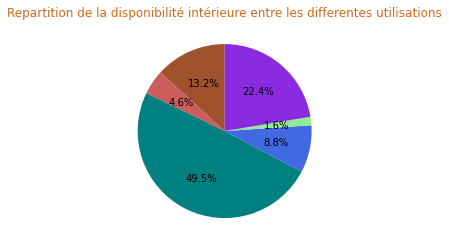

In [65]:
#Creation d'un dataframe contenant les sommes des colonnes ('Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences','Traitement')
cam = df_da[['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences','Traitement']].sum()

#liste de couleurs attribuees au diagramme
colors = ['sienna', 'indianred', 'teal', 'royalblue', 'lightgreen', 'blueviolet']

#trace les axes de facon orthonorme 
plt.axis('equal')

#donne le titre du diagramme
plt.title('Repartition de la disponibilité intérieure entre les differentes utilisations', color='chocolate')

#création du diagramme circulaire avec ses paramètres spécifiés 
a, b, c = plt.pie(cam, labels=['Aliments pour animaux', 'Pertes', 'Nourriture', 'Autres Utilisations', 'Semences', 'Traitement'], 
                  autopct='%1.1f%%', startangle=90, colors=colors)

#couleurs des labels
for text in b:
    text.set_color('white')
    
#couleurs des valeurs
for autotext in c:
    autotext.set_color('black')

<h2>RECHERCHE DE JULIEN</h2>

<font color='turquoise'>**REPARTITION DES CEREALES ENTRE L'ALIMENTATION ANIMALE ET LA NOURRITURE**<font/>

In [66]:
#création d'un dataframe à partir de disponibilité alimentaire filtrée sur les cereales seulement
df_cereales=df_da[df_da['Produit'].isin(['Blé et produits', 'Riz et produits', 'Orge et produits', 
                                           'Maïs et produits', 'Seigle et produits', 
                                            'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres'])]

#utilisation des cereales('Blé et produits', 'Riz et produits', 'Orge et produits', 'Maïs et produits', 
#'Seigle et produits', 'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres')
#pour l'alimentation animale en 2017
cereales_animaux=sum(df_cereales['Aliments pour animaux']) * 100 / sum(df_cereales['Dispo interieure'])

#utilisation des cereales('Blé et produits', 'Riz et produits', 'Orge et produits', 'Maïs et produits', 
#'Seigle et produits', 'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres')
#pour la nourriture en 2017
cereales_nourriture=sum(df_cereales['Nourriture']) * 100 / sum(df_cereales['Dispo interieure'])

print(round(cereales_animaux,2), '% des cereales sont utilisés pour les animaux')
print(round(cereales_nourriture,2), '% des cereales sont utilisés pour la nourriture')

69.34 % des cereales sont utilisés pour les animaux
18.13 % des cereales sont utilisés pour la nourriture


<font color='turquoise'>**EXPORTATION DU MANIOC PAR RAPPORT A SA PRODUCTION EN THAÏLANDE**<font/>

In [67]:
#Données sur l'utilisation du manioc en Thailande à partir de la table Disponibilité alimentaire
df_manioc_thai=df_da[(df_da['Produit']=='Manioc')&(df_da['Pays']=='Thaïlande')]

#Calcul du rapport de l'exportation du manioc en Thaïlande par rapport à sa production
manioc=sum(df_manioc_thai['Exportations - Quantité']) *100 / sum(df_manioc_thai['Production'])

print('Proportion de manioc exporté par rapport a sa production en Thaïlande en 2017:', round(manioc,2),'%')

Proportion de manioc exporté par rapport a sa production en Thaïlande en 2017: 83.41 %


<h2>REQUETES DE MELANIE</h2>

<font color='turquoise'>**PAYS POUR LESQUELS LA PROPORTION DE PERSONNES SOUS-ALIMENTEES EST LA PLUS FORTE EN 2017**<font/>

In [68]:
df_sn_pop=pd.merge(df_sn, df_pop, left_on='Pays', right_on='Pays')
df_sn_pop2017=df_sn_pop[(df_sn_pop['Année_x']=='2016-2018') & (df_sn_pop['Année_y']==2017)]

df_sn_pop2017['Proportion']=df_sn_pop2017['Nb hab sousnut'] * 100 / df_sn_pop2017['Nb hab']

df_sn_pop2017.sort_values('Proportion', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Pays,Année_x,Nb hab sousnut,Année_y,Nb hab,Proportion
2728,Haïti,2016-2018,5300000.0,2017,10982366.0,48.259182
5572,République populaire démocratique de Corée,2016-2018,12000000.0,2017,25429825.0,47.188685
3808,Madagascar,2016-2018,10500000.0,2017,25570512.0,41.062924
3628,Libéria,2016-2018,1800000.0,2017,4702226.0,38.279742
3520,Lesotho,2016-2018,800000.0,2017,2091534.0,38.249438
6508,Tchad,2016-2018,5700000.0,2017,15016753.0,37.957606
5716,Rwanda,2016-2018,4200000.0,2017,11980961.0,35.055619
4276,Mozambique,2016-2018,9400000.0,2017,28649018.0,32.810898
6616,Timor-Leste,2016-2018,400000.0,2017,1243258.0,32.173531
28,Afghanistan,2016-2018,10500000.0,2017,36296113.0,28.928718


<font color='turquoise'>**PAYS QUI ONT LE PLUS BENEFICIE D’AIDE DEPUIS 2013**<font/>

In [69]:
#Regroupement par pays et somme des quantites d'aide alimentaire par pays entre 2013 et 2016
df_aal_sum=df_aa[['Pays', 'Quantite']].groupby('Pays').sum(['Quantite'])

#Affiche les pays qui ont le plus bénéficié d'aide dans l'odre decroissant
df_aal_sum.sort_values('Quantite', ascending=False).head(10)

,Quantite
Pays,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


<font color='turquoise'>**PAYS AYANT LE PLUS DE DISPONIBILITE/HABITANT**<font>

In [70]:
##Regroupement par pays et somme de la disponibilité par habitant totale de chaque pays 
df_daa_sum=df_da[['Pays', 'Dispo al']].groupby('Pays').sum(['Dispo al'])

#Affiche les pays qui ont le plus de disponibilité par habitant
df_daa_sum.sort_values('Dispo al', ascending=False).head(10)

,Dispo al
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


<font color='turquoise'>**PAYS AYANT LE MOINS DE DISPONIBILITE/HABITANT**<font>

In [71]:
#Affiche les pays qui ont le moins de disponibilité par habitant
df_daa_sum.sort_values('Dispo al', ascending=True).head(10)

,Dispo al
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0
